In [2]:
# importing the packages are needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading the dataset from .json files
dev_df = pd.read_json("dev.json")
other_df = pd.read_json("train_others.json")
spider_df = pd.read_json("train_spider.json")
dev_df

,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
0,concert_singer,SELECT count(*) FROM singer,"[SELECT, count, (, *, ), FROM, singer]","[select, count, (, *, ), from, singer]",How many singers do we have?,"[How, many, singers, do, we, have, ?]","{'from': {'table_units': [['table_unit', 1]], ..."
1,concert_singer,SELECT count(*) FROM singer,"[SELECT, count, (, *, ), FROM, singer]","[select, count, (, *, ), from, singer]",What is the total number of singers?,"[What, is, the, total, number, of, singers, ?]","{'from': {'table_units': [['table_unit', 1]], ..."
2,concert_singer,"SELECT name , country , age FROM singer ORDE...","[SELECT, name, ,, country, ,, age, FROM, singe...","[select, name, ,, country, ,, age, from, singe...","Show name, country, age for all singers ordere...","[Show, name, ,, country, ,, age, for, all, sin...","{'from': {'table_units': [['table_unit', 1]], ..."
3,concert_singer,"SELECT name , country , age FROM singer ORDE...","[SELECT, name, ,, country, ,, age, FROM, singe...","[select, name, ,, country, ,, age, from, singe...","What are the names, countries, and ages for ev...","[What, are, the, names, ,, countries, ,, and, ...","{'from': {'table_units': [['table_unit', 1]], ..."
4,concert_singer,"SELECT avg(age) , min(age) , max(age) FROM s...","[SELECT, avg, (, age, ), ,, min, (, age, ), ,,...","[select, avg, (, age, ), ,, min, (, age, ), ,,...","What is the average, minimum, and maximum age ...","[What, is, the, average, ,, minimum, ,, and, m...","{'from': {'table_units': [['table_unit', 1]], ..."
...,...,...,...,...,...,...,...
1029,singer,SELECT Citizenship FROM singer WHERE Birth_Yea...,"[SELECT, Citizenship, FROM, singer, WHERE, Bir...","[select, citizenship, from, singer, where, bir...",What are the citizenships that are shared by s...,"[What, are, the, citizenships, that, are, shar...","{'from': {'table_units': [['table_unit', 0]], ..."
1030,real_estate_properties,SELECT count(*) FROM Other_Available_Features,"[SELECT, count, (, *, ), FROM, Other_Available...","[select, count, (, *, ), from, other_available...",How many available features are there in total?,"[How, many, available, features, are, there, i...","{'from': {'table_units': [['table_unit', 2]], ..."
1031,real_estate_properties,SELECT T2.feature_type_name FROM Other_Availab...,"[SELECT, T2.feature_type_name, FROM, Other_Ava...","[select, t2, ., feature_type_name, from, other...",What is the feature type name of feature AirCon?,"[What, is, the, feature, type, name, of, featu...","{'from': {'table_units': [['table_unit', 2], [..."
1032,real_estate_properties,SELECT T2.property_type_description FROM Prope...,"[SELECT, T2.property_type_description, FROM, P...","[select, t2, ., property_type_description, fro...",Show the property type descriptions of propert...,"[Show, the, property, type, descriptions, of, ...","{'from': {'table_units': [['table_unit', 3], [..."


In [22]:
# to check the basic information of the dataset
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   db_id                1034 non-null   object
 1   query                1034 non-null   object
 2   query_toks           1034 non-null   object
 3   query_toks_no_value  1034 non-null   object
 4   question             1034 non-null   object
 5   question_toks        1034 non-null   object
 6   sql                  1034 non-null   object
dtypes: object(7)
memory usage: 56.7+ KB


In [58]:
# storing the counts of the question from "db_id" as a distionary
dev_his = dict(dev_df["db_id"].value_counts())
dev_his

{'world_1': 120,
 'car_1': 92,
 'cre_Doc_Template_Mgt': 84,
 'dog_kennels': 82,
 'flight_2': 80,
 'student_transcripts_tracking': 78,
 'tvshow': 62,
 'wta_1': 62,
 'network_1': 56,
 'concert_singer': 45,
 'pets_1': 42,
 'orchestra': 40,
 'poker_player': 40,
 'employee_hire_evaluation': 38,
 'course_teach': 30,
 'singer': 30,
 'museum_visit': 18,
 'battle_death': 16,
 'voter_1': 15,
 'real_estate_properties': 4}

<ipython-input-54-0f2ffb8958cd>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


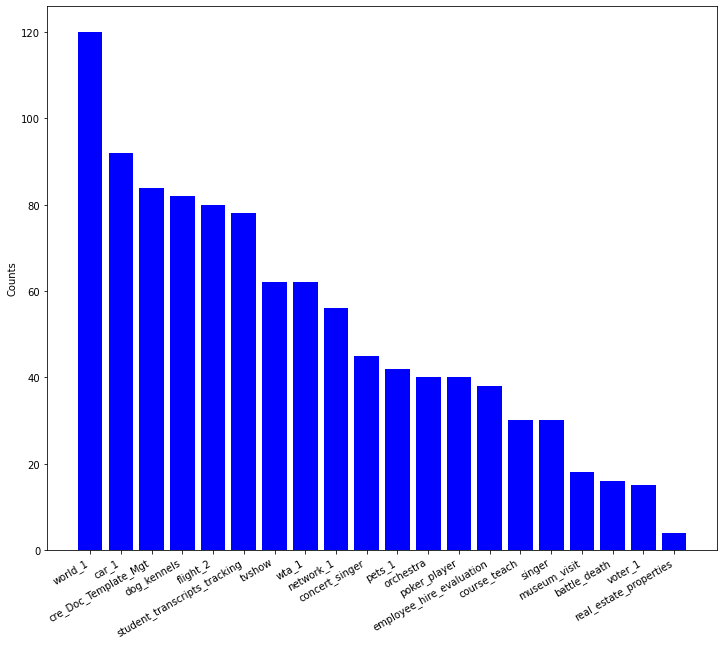

In [54]:
# ploting a histogram to show the distribution of the types of questions
plt.figure(figsize=(12,10)) 
plt.ylabel('Counts')
ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.bar(list(dev_his.keys()), dev_his.values(), color='b')
plt.savefig("dev_his.jpg", dpi=1200)
plt.show()
